In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import plotly.express as px

In [232]:
RY_raw = pd.read_csv("RY.csv")

In [229]:
RY_raw.tail()

Date       Open       High        Low      Close  Adj Close  \
2512  2019-11-14  81.709999  81.809998  81.459999  81.769997  81.769997   
2513  2019-11-15  81.839996  82.269997  81.709999  82.260002  82.260002   
2514  2019-11-18  82.040001  82.459999  82.019997  82.349998  82.349998   
2515  2019-11-19  82.389999  82.440002  81.910004  82.000000  82.000000   
2516  2019-11-20  81.769997  82.110001  81.660004  81.809998  81.809998   

      Volume  
2512  435200  
2513  634400  
2514  546200  
2515  612400  
2516  996200

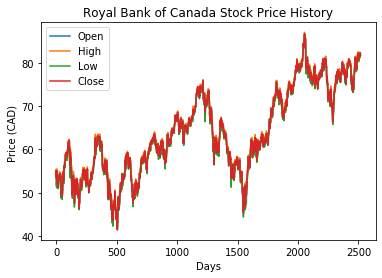

In [4]:
plt.figure()
plt.plot(RY_raw["Open"])
plt.plot(RY_raw["High"])
plt.plot(RY_raw["Low"])
plt.plot(RY_raw["Close"])
plt.title('Royal Bank of Canada Stock Price History')
plt.ylabel('Price (CAD) ')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc = 'upper left')
plt.show()

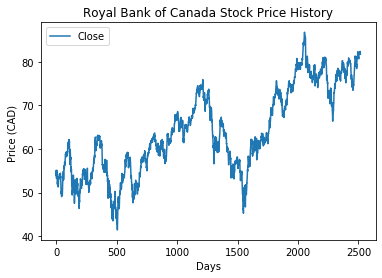

In [6]:
plt.figure()
plt.plot(RY_raw["Close"])
plt.title('Royal Bank of Canada Stock Price History')
plt.ylabel('Price (CAD) ')
plt.xlabel('Days')
plt.legend(['Close'], loc = 'upper left')
plt.show()

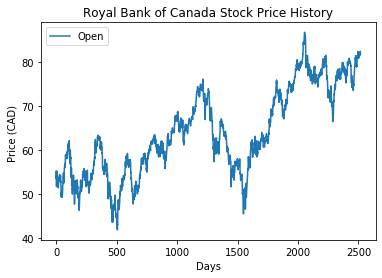

In [10]:
plt.figure()
plt.plot(RY_raw["Open"])
plt.title('Royal Bank of Canada Stock Price History')
plt.ylabel('Price (CAD) ')
plt.xlabel('Days')
plt.legend(['Open'], loc = 'upper left')
plt.show()

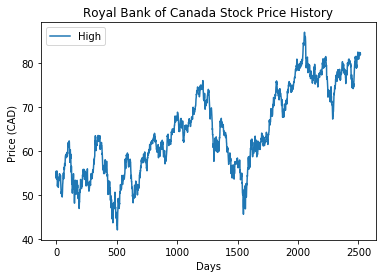

In [11]:
plt.figure()
plt.plot(RY_raw["High"])
plt.title('Royal Bank of Canada Stock Price History')
plt.ylabel('Price (CAD) ')
plt.xlabel('Days')
plt.legend(['High'], loc = 'upper left')
plt.show()

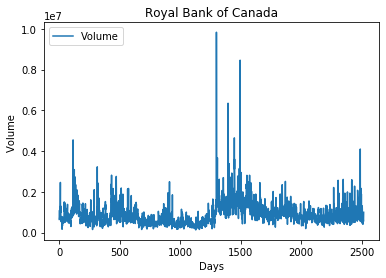

In [27]:
plt.figure()
plt.plot(RY_raw["Volume"])
plt.title('Royal Bank of Canada')
plt.ylabel('Volume ')
plt.xlabel('Days')
plt.legend(['Volume'], loc = 'upper left')
plt.show()

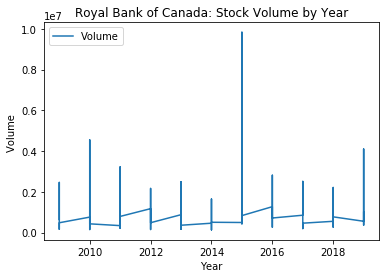

In [25]:
plt.figure()
plt.plot(RY_raw["Year"], RY_raw["Volume"])
plt.title('Royal Bank of Canada: Stock Volume by Year')
plt.ylabel('Volume ')
plt.xlabel('Year')
plt.legend(['Volume'], loc = 'upper left')
plt.show()

In [ ]:
RY_raw['Date'] = pd.to_datetime(RY_raw.Date,format='%Y-%m-%d')
RY_raw.index = RY_raw['Date']

In [237]:
Stationarity_check_closeprice= RY_raw['Close']

In [216]:
RY_new_data

Date  Close
0     2009-11-20 00:00:00  53.94
1     2009-11-23 00:00:00  55.07
2     2009-11-24 00:00:00  54.28
3     2009-11-25 00:00:00  54.64
4     2009-11-27 00:00:00  53.24
...                   ...    ...
2512  2019-11-14 00:00:00  81.77
2513  2019-11-15 00:00:00  82.26
2514  2019-11-18 00:00:00  82.35
2515  2019-11-19 00:00:00     82
2516  2019-11-20 00:00:00  81.81

[2517 rows x 2 columns]

In [242]:
Stationarity_check_closeprice

Date
2009-11-20    53.939999
2009-11-23    55.070000
2009-11-24    54.279999
2009-11-25    54.639999
2009-11-27    53.240002
                ...    
2019-11-14    81.769997
2019-11-15    82.260002
2019-11-18    82.349998
2019-11-19    82.000000
2019-11-20    81.809998
Name: Close, Length: 2517, dtype: float64

In [190]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

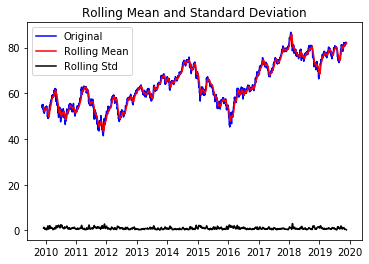

Results of dickey fuller test
Test Statistics                  -1.442381
p-value                           0.561798
No. of lags used                  0.000000
Number of observations used    2516.000000
critical value (1%)              -3.432952
critical value (5%)              -2.862689
critical value (10%)             -2.567382
dtype: float64


In [191]:
# Check for stationarity for closing price od the stocks

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(Stationarity_check_closeprice)
#he Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence.

<Figure size 432x288 with 0 Axes>

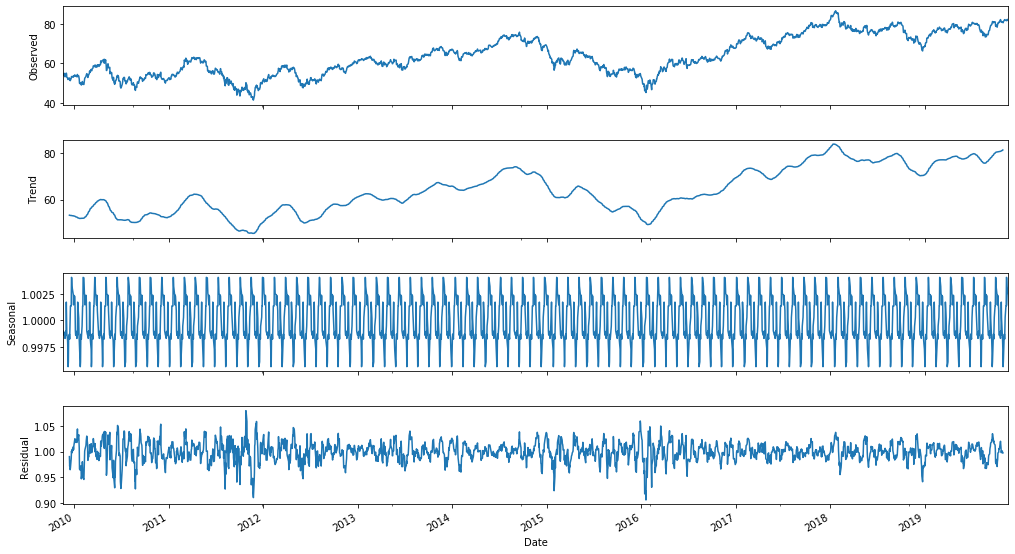

In [192]:
#separate Trend and Seasonality from the time series
result = seasonal_decompose(Stationarity_check_closeprice, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


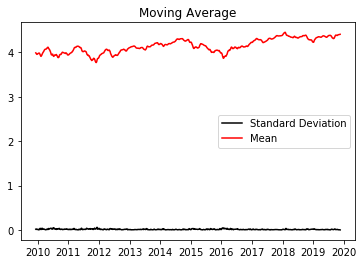

In [195]:
# Transformation to log
log_closeprice = np.log(Stationarity_check_closeprice)
moving_avg = log_closeprice.rolling(12).mean()
std_dev = log_closeprice.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.show()
# Move to moving Average

In [5]:
RY_raw.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [55]:
RY_raw.describe()

Open         High          Low        Close    Adj Close  \
count  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000   
mean     63.981625    64.397652    63.539090    63.992527    53.036870   
std       9.915361     9.886003     9.960775     9.919575    13.828898   
min      41.849998    42.070000    41.400002    41.430000    29.803961   
25%      56.099998    56.570000    55.680000    56.209999    41.775330   
50%      62.180000    62.549999    61.790001    62.209999    50.800888   
75%      73.050003    73.489998    72.610001    72.970001    64.452400   
max      86.709999    87.099998    86.500000    86.750000    82.349998   

             Volume  
count  2.517000e+03  
mean   8.906182e+05  
std    5.708480e+05  
min    1.327000e+05  
25%    5.423000e+05  
50%    7.630000e+05  
75%    1.089400e+06  
max    9.830200e+06

In [56]:
RY_raw.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [5]:
from datetime import date

In [112]:
RY_raw.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [113]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [4]:
RY_raw['Year'] = pd.DatetimeIndex(RY_raw['Date']).year

In [233]:
RY_raw['Date'] = pd.to_datetime(RY_raw.Date,format='%Y-%m-%d')
RY_raw.index = RY_raw['Date']

In [5]:
RY_raw['Month'] = pd.DatetimeIndex(RY_raw['Date']).month

In [6]:
RY_raw['Day'] = pd.DatetimeIndex(RY_raw['Date']).day

In [104]:
#Convert Date from datatype object to datetime
RY_raw['Date'] = pd.to_datetime(RY_raw['Date'])

In [8]:
RY_raw['WeekofYear'] = RY_raw['Date'].dt.week

In [9]:
RY_raw['WeekDay'] = RY_raw['Date'].dt.dayofweek
#The day of the week with Monday=0, Sunday=6.
#Series.dt.dayofweek/weekday/day_name"

In [63]:
RY_raw.head()

Date       Open       High        Low      Close  Adj Close  \
Date                                                                           
2009-11-20 2009-11-20  53.570000  54.029999  53.560001  53.939999  36.015869   
2009-11-23 2009-11-23  54.860001  55.450001  54.860001  55.070000  36.770374   
2009-11-24 2009-11-24  55.220001  55.330002  54.200001  54.279999  36.242901   
2009-11-25 2009-11-25  54.650002  55.180000  54.549999  54.639999  36.483265   
2009-11-27 2009-11-27  51.700001  53.680000  51.299999  53.240002  35.548489   

             Volume  
Date                 
2009-11-20   647900  
2009-11-23   770400  
2009-11-24  1097500  
2009-11-25   652000  
2009-11-27   759300

In [13]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [39]:
import plotly.express as px

In [15]:
plot_length = 2200
plot_df = RY_raw.copy(deep=True).iloc[:plot_length]
plot_df['WeekDay'] = plot_df['Date'].dt.weekday_name

fig = px.line(plot_df, x = "Date", y = "Close", color = "WeekDay",
             title = "Royal Bank of Canada")

In [16]:
fig.show()

In [20]:
plot_length = 2200
plot_df = RY_raw.copy(deep=True).iloc[:plot_length]
plot_df['WeekDay'] = plot_df['Date'].dt.weekday_name

fig = px.line(plot_df, x = "Year", y = "Volume", 
             title = "Royal Bank of Canada")

In [21]:
fig.show()

In [27]:
##from sklearn.preprocessing import MinMaxScaler
##from sklearn.model_selection import train_test_split

In [69]:
train_cols = ["Open","High","Low","Close","Volume"]
RY_train, RY_test = train_test_split(RY_raw, train_size = 0.8, test_size = 0.2, shuffle = False)
print("Train and Test size", len(RY_train), len(RY_test))
# Scale the features Minmax, build array
x = RY_train.loc[:,train_cols].values
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
x_test = min_max_scaler.transform(RY_test.loc[:, train_cols])

Train and Test size 2013 504


In [71]:
#DNU
def build_timeseries(mat, y_col_index):
        dim_0 = mat.shape[0] - TIME_STEPS
        dim_1 = mat.shape[1]
        x = np.zeros((dim_0, TIME_STEPS, dim_1))
        y = np.zeros((dim_0,))
        
        for i in tqdm_notebook(range(dim_0)):
            x[i] = mat[1:TIME_STEPS+i]
            y[i] = mat[TIME_STEPS+i, y_col_index]
        print("lenght of time-series i/o", x.shape,y.shape)      
        return x,y

In [72]:
#DNU
def trim_dataset(mat, batch_size):
        #        trims dataset to a size thats deivisible by BATCH_SIZE         \"\"\"\
         
        no_of_rows_drop = mat.shape[0]%batch_size
        if(no_of_rows_drop > 0):
           return mat[:- no_of_rows_drop ]
        else:
           return mat

In [76]:
# #DNU Forming the train, validation and test \n"
    xt  = build_timeseries(x_train, 3)
    yt  = build_timeseries(x_train, 3)
    xt = trim_dataset(xt, BATCH_SIZE)
    yt = trim_dataset(yt, BATCH_SIZE)
    x_temp, y_temp = build_timeseries(x_test, 3)
    x_val, x_test_t = np.split(trim_dataset(x_temp, BATCH_SIZE), 2)
    y_val, y_test_t = np.split(trim_dataset(y_temp, BATCH_SIZE),2)

IndentationError: unexpected indent (<ipython-input-76-43241a9bd04a>, line 2)

In [13]:
RY_raw.head()

Date       Open       High        Low      Close  Adj Close   Volume  \
0 2009-11-20  53.570000  54.029999  53.560001  53.939999  36.015869   647900   
1 2009-11-23  54.860001  55.450001  54.860001  55.070000  36.770374   770400   
2 2009-11-24  55.220001  55.330002  54.200001  54.279999  36.242901  1097500   
3 2009-11-25  54.650002  55.180000  54.549999  54.639999  36.483265   652000   
4 2009-11-27  51.700001  53.680000  51.299999  53.240002  35.548489   759300   

   Year  Month  Day  WeekofYear  WeekDay  
0  2009     11   20          47        4  
1  2009     11   23          48        0  
2  2009     11   24          48        1  
3  2009     11   25          48        2  
4  2009     11   27          48        4

In [ ]:
#Moving Average
scaler = MinMaxScaler(feature_range=(0, 1))
RY_raw['Date'] = pd.to_datetime(RY_raw.Date,format='%Y-%m-%d')
RY_raw.index = RY_raw['Date']

In [34]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])


In [59]:
RY_raw.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [115]:
#Create new table data with Date and Closing price
RY_close = RY_raw.sort_index(ascending=True,axis = 0)
RY_new_date = pd.DataFrame(index=range(0,len(RY_raw)), columns=['Date','Close'])

In [119]:

for i in range(0,len(RY_close)):
     RY_new_date['Date'][i] = RY_close['Date'][i]
     RY_new_date['Close'][i] = RY_close['Close'][i]

In [120]:
RY_new_date.tail()

Date  Close
2512  2019-11-14 00:00:00  81.77
2513  2019-11-15 00:00:00  82.26
2514  2019-11-18 00:00:00  82.35
2515  2019-11-19 00:00:00     82
2516  2019-11-20 00:00:00  81.81

In [140]:
RY_train, RY_test = train_test_split(RY_new_date, train_size = 0.7, test_size = 0.3, shuffle = False)


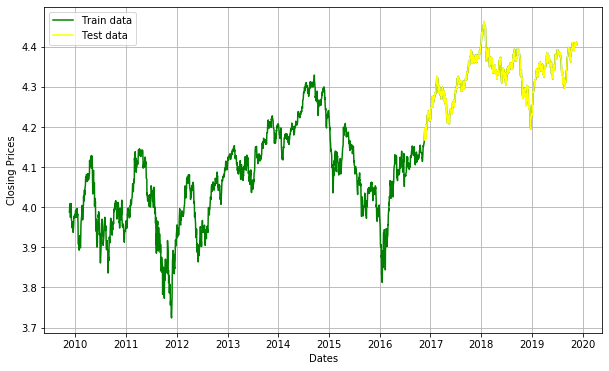

In [200]:
# Plotting the test and the train data log_closeprice
#train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
RY_log_train, RY_log_test = train_test_split(log_closeprice, train_size = 0.7, test_size = 0.3, shuffle = False)
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(log_closeprice, 'green', label='Train data')
plt.plot(RY_log_test, 'yellow', label='Test data')
plt.legend()

In [248]:
type(RY_log_train)

pandas.core.series.Series

In [292]:
# converting train series to frame
RY_df_log_train=RY_log_train#.to_frame().reset_index()
RY_df_log_train.reset_index(name='Close')
TR_Log_Price= RY_df_log_train.to_frame(name='Close')



In [341]:
log_closeprice

Date
2009-11-20    3.987872
2009-11-23    4.008605
2009-11-24    3.994156
2009-11-25    4.000766
2009-11-27    3.974810
                ...   
2019-11-14    4.403910
2019-11-15    4.409885
2019-11-18    4.410978
2019-11-19    4.406719
2019-11-20    4.404399
Name: Close, Length: 2517, dtype: float64

In [293]:
TR_Log_Price

Close
Date                
2009-11-20  3.987872
2009-11-23  4.008605
2009-11-24  3.994156
2009-11-25  4.000766
2009-11-27  3.974810
...              ...
2016-11-11  4.150567
2016-11-14  4.157163
2016-11-15  4.158727
2016-11-16  4.159039
2016-11-17  4.164181

[1761 rows x 1 columns]

In [294]:
# converting train series to frame
RY_df_log_test=RY_log_test#.to_frame().reset_index()
RY_df_log_test.reset_index(name='Close')
Test_Log_Price_LR= RY_df_log_test.to_frame(name='Close')
Test_Log_Price= RY_df_log_test.to_frame(name='Close')



In [324]:
Test_Log_Price_LR= RY_df_log_test.to_frame(name='Close')

In [340]:
#Test_Log_Price_LR
TR_Log_Price

Close
Date                
2009-11-20  3.987872
2009-11-23  4.008605
2009-11-24  3.994156
2009-11-25  4.000766
2009-11-27  3.974810
...              ...
2016-11-11  4.150567
2016-11-14  4.157163
2016-11-15  4.158727
2016-11-16  4.159039
2016-11-17  4.164181

[1761 rows x 1 columns]

In [250]:
print('\n Shape of Training set:')
print(RY_df_log_train.shape)
RY_train


 Shape of Training set:
(1761, 1)


Date  Close
0     2009-11-20 00:00:00  53.94
1     2009-11-23 00:00:00  55.07
2     2009-11-24 00:00:00  54.28
3     2009-11-25 00:00:00  54.64
4     2009-11-27 00:00:00  53.24
...                   ...    ...
1756  2016-11-11 00:00:00  63.47
1757  2016-11-14 00:00:00  63.89
1758  2016-11-15 00:00:00  63.99
1759  2016-11-16 00:00:00  64.01
1760  2016-11-17 00:00:00  64.34

[1761 rows x 2 columns]

In [264]:
print('\n Shape of Test set:')
print(RY_test.shape)
RY_test


 Shape of Test set:
(756, 3)


Date  Close  Predictions
1761  2016-11-18 00:00:00  64.55    62.810820
1762  2016-11-21 00:00:00  66.37    62.803242
1763  2016-11-22 00:00:00  66.33    62.795614
1764  2016-11-23 00:00:00  66.59    62.788716
1765  2016-11-25 00:00:00  66.53    62.781810
...                   ...    ...          ...
2512  2019-11-14 00:00:00  81.77    60.972686
2513  2019-11-15 00:00:00  82.26    60.969383
2514  2019-11-18 00:00:00  82.35    60.965520
2515  2019-11-19 00:00:00     82    60.961519
2516  2019-11-20 00:00:00  81.81    60.957487

[756 rows x 3 columns]

In [260]:
print(RY_df_log_test.shape)

(756, 1)


In [255]:

#moving AVerage: Create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0, RY_test.shape[0]):
    a = RY_train['Close'][len(RY_train)- 756 + i:] .sum() + sum(preds)
    b = a/756
    preds.append(b)
    
    # 50, RMSE =13366485
    #500, RMSE = 14.9
    #756, RMSE =15.8 
    #250 130
    #300, 67
    #270, 98
    
  
    

In [313]:
preds1 = []
for i in range(0, Test_Log_Price.shape[0]):
    a = TR_Log_Price['Close'][len(TR_Log_Price)- 756 + i:] .sum() + sum(preds1)
    b = a/756
    preds1.append(b)
    

In [300]:
preds1

[4.135100983456457,
 4.134978871621034,
 4.1348560194389234,
 4.134743851762791,
 4.134631535716717,
 4.1345223817526895,
 4.134427985476211,
 4.134344155714117,
 4.134260612786192,
 4.134183937462103,
 4.134126491855477,
 4.134081197250726,
 4.134047564041079,
 4.133997872726697,
 4.1339312857445725,
 4.133870264318947,
 4.13382401678664,
 4.13378963041604,
 4.133748196508964,
 4.133691189037255,
 4.133641230449236,
 4.133579825352584,
 4.133502449313137,
 4.133428173793675,
 4.133339844780248,
 4.133246252761112,
 4.133152536943009,
 4.133065827934314,
 4.132967928378978,
 4.132868521378019,
 4.132772529138479,
 4.132675818242141,
 4.132594051453007,
 4.1325203792515515,
 4.132450226991413,
 4.132384012955963,
 4.132321754534653,
 4.13225416005081,
 4.132202300630797,
 4.13214772193127,
 4.132085961113039,
 4.132019668954096,
 4.131932653588138,
 4.131856301619304,
 4.131812721357859,
 4.131787288574074,
 4.131784300954366,
 4.131783642091127,
 4.131799427548413,
 4.131797515776372,


In [314]:
#MAPE np.mean(np.abs(forecast - actual)/np.abs(actual)) 
#MA_MAPE = np.mean(np.abs(np.array(preds-RY_test['Close'])/np.abs(RY_test['Close']))) 
#print(MA_MAPE) 0.24834066045880754
log_MA_MAPE = np.mean(np.abs(np.array(preds1-Test_Log_Price['Close'])/np.abs(Test_Log_Price['Close']))) 
print(log_MA_MAPE) #0.27
#Around 7% MAPE(Mean Absolute Percentage Error) implies the model is about 95% accurate #in predicting the test set observations.

0.05162688598334086


In [269]:
preds1

[]

In [184]:
from sklearn.metrics import mean_squared_error

In [386]:
#MA_MAPE = np.mean(np.abs(np.array(preds-RY_test['Close'])/np.abs(RY_test['Close']))) 
#print(MA_MAPE) 0.24834066045880754

log_MA_mse = mean_squared_error(Test_Log_Price['Close'], preds1)
print('MSE with naive approach : ', log_MA_mse)

log_MA_rmse = np.sqrt(mean_squared_error(Test_Log_Price['Close'], preds1))
print('RMSE with naive approach : ', log_MA_rmse)

MSE with naive approach :  0.05452857704599903
RMSE with naive approach :  0.23351354788534012


In [317]:
MA_MAPE = np.mean(np.abs(np.array(preds-RY_test['Close'])/np.abs(RY_test['Close']))) 
#print(MA_MAPE) 0.24834066045880754

mse = mean_squared_error(RY_test['Close'], preds)
print('MSE with naive approach : ', mse) #250

rmse = np.sqrt(mean_squared_error(RY_test['Close'], preds))
print('RMSE with naive approach : ', rmse)#RSME value on validation set:
15.811643717557098

ValueError: operands could not be broadcast together with shapes (3024,) (756,) 

In [176]:
#Checking the results (RMSEValue)

MA_rms=np.sqrt(np.mean(np.power((np.array(RY_test['Close'])-preds),2)))
print('\n RSME value on validation set:')
print(MA_rms)




 RSME value on validation set:
15.811643717557098


In [178]:
MA_mse=np.mean(np.power((np.array(RY_test['Close'])-preds),2))
print('\n MSE value on validation set:')
print(MA_mse)


 MSE value on validation set:
250.00807705096284


C:\Users\contr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\contr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



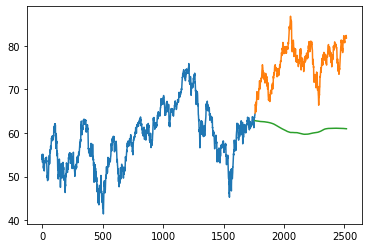

In [177]:
# PLot Prediction of Moving Average
RY_test['Predictions'] = 0
RY_test['Predictions'] = preds
plt.plot(RY_train['Close'])
plt.plot(RY_test[['Close','Predictions']])

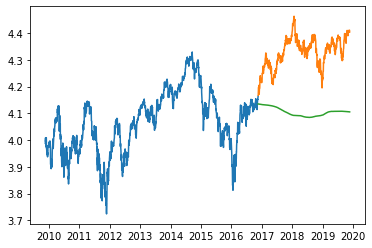

In [319]:
# PLot Prediction of Moving Average
Test_Log_Price['Predictions'] = 0
Test_Log_Price['Predictions'] = preds1
plt.plot(TR_Log_Price['Close'])
plt.plot(Test_Log_Price[['Close','Predictions']])

In [444]:
LSTM_base_closeprice =log_closeprice
#LSTM_base_closeprice.reset_index(name='Close')
#LSTM_base_closeprice.reset_index(level=0, inplace=True)
#LSTM_log_base_closeprice= LSTM_base_closeprice.to_frame(name='Close')



In [446]:
log_base_closeprice.shape()

TypeError: 'tuple' object is not callable

In [436]:
LSTM_log_base_closeprice.rename(columns={'new name': 'Date'}, inplace=True)

In [359]:
#converting index column to dataframe column by reeducing the level
log_base_closeprice.shape (2517, 1)
log_base_closeprice
log_base_closeprice.reset_index(level=0, inplace=True)
# log_base_closeprice['Date'] = log_base_closeprice['new name'] log_base_closeprice = log_base_closeprice.drop('Date',1)
log_base_closeprice.rename(columns={'new name': 'Date'}, inplace=True)

Date     Close
0    2009-11-20  3.987872
1    2009-11-23  4.008605
2    2009-11-24  3.994156
3    2009-11-25  4.000766
4    2009-11-27  3.974810
...         ...       ...
2512 2019-11-14  4.403910
2513 2019-11-15  4.409885
2514 2019-11-18  4.410978
2515 2019-11-19  4.406719
2516 2019-11-20  4.404399

[2517 rows x 2 columns]

In [105]:
RY_raw['Date'] = pd.to_datetime(RY_raw.Date,format='%Y-%m-%d')

In [106]:
RY_raw.index = RY_raw['Date']

In [107]:
RY_raw_new = RY_raw.sort_index(ascending = True, axis=0)


In [348]:
RY_RW_sub1 = pd.DataFrame(index=range(0,len(RY_raw_new)),columns=['Date','Close'])

In [109]:
RY_RW_sub.head()

Date Close
0  NaN   NaN
1  NaN   NaN
2  NaN   NaN
3  NaN   NaN
4  NaN   NaN

In [110]:
for i in range(0, len(RY_raw_new)):
    RY_RW_sub['Date'][i] = RY_raw_new['Date'][i]
    RY_RW_sub['Close'][i] = RY_raw_new['Close'][i]

In [111]:
RY_RW_sub.head()

Date  Close
0  2009-11-20 00:00:00  53.94
1  2009-11-23 00:00:00  55.07
2  2009-11-24 00:00:00  54.28
3  2009-11-25 00:00:00  54.64
4  2009-11-27 00:00:00  53.24

In [42]:
#Create Features
from fastai.tabular import add_datepart

In [559]:
RY_raw['Year'] = pd.DatetimeIndex(RY_raw['Date']).year

In [560]:
RY_raw['Month'] = pd.DatetimeIndex(RY_raw['Date']).month

In [561]:
RY_raw['Day'] = pd.DatetimeIndex(RY_raw['Date']).day

In [562]:
#Convert Date from datatype object to datetime
RY_raw['Date'] = pd.to_datetime(RY_raw['Date'])

In [563]:
RY_raw['WeekofYear'] = RY_raw['Date'].dt.week

In [564]:
RY_raw['WeekDay'] = RY_raw['Date'].dt.dayofweek
#The day of the week with Monday=0, Sunday=6.
#Series.dt.dayofweek/weekday/day_name"

In [43]:
# Addign all the above at once
add_datepart(RY_RW_sub,'Date')

Close  Year  Month  Week  Day  Dayofweek  Dayofyear  Is_month_end  \
0     53.94  2009     11    47   20          4        324         False   
1     55.07  2009     11    48   23          0        327         False   
2     54.28  2009     11    48   24          1        328         False   
3     54.64  2009     11    48   25          2        329         False   
4     53.24  2009     11    48   27          4        331         False   
...     ...   ...    ...   ...  ...        ...        ...           ...   
2512  81.77  2019     11    46   14          3        318         False   
2513  82.26  2019     11    46   15          4        319         False   
2514  82.35  2019     11    47   18          0        322         False   
2515     82  2019     11    47   19          1        323         False   
2516  81.81  2019     11    47   20          2        324         False   

      Is_month_start  Is_quarter_end  Is_quarter_start  Is_year_end  \
0              False           False             False        False   
1              False           False             False        False   
2              False           False             False        False   
3              False           False             False        False   
4              False           False             False        False   
...              ...             ...               ...          ...   
2512           False           False             False        False   
2513           False           False             False        False   
2514           False           False             False        False   
2515           False           False             False        False   
2516           False           False             False        False   

      Is_year_start     Elapsed  
0             False  1258675200  
1             False  1258934400  
2             False  1259020800  
3             False  1259107200  
4             False  1259280000  
...             ...         ...  
2512          False  1573689600  
2513          False  1573776000  
2514          False  1574035200  
2515          False  1574121600  
2516          False  1574208000  

[2517 rows x 14 columns]

In [360]:
add_datepart(log_base_closeprice,'Date')

Close  Year  Month  Week  Day  Dayofweek  Dayofyear  Is_month_end  \
0     3.987872  2009     11    47   20          4        324         False   
1     4.008605  2009     11    48   23          0        327         False   
2     3.994156  2009     11    48   24          1        328         False   
3     4.000766  2009     11    48   25          2        329         False   
4     3.974810  2009     11    48   27          4        331         False   
...        ...   ...    ...   ...  ...        ...        ...           ...   
2512  4.403910  2019     11    46   14          3        318         False   
2513  4.409885  2019     11    46   15          4        319         False   
2514  4.410978  2019     11    47   18          0        322         False   
2515  4.406719  2019     11    47   19          1        323         False   
2516  4.404399  2019     11    47   20          2        324         False   

      Is_month_start  Is_quarter_end  Is_quarter_start  Is_year_end  \
0              False           False             False        False   
1              False           False             False        False   
2              False           False             False        False   
3              False           False             False        False   
4              False           False             False        False   
...              ...             ...               ...          ...   
2512           False           False             False        False   
2513           False           False             False        False   
2514           False           False             False        False   
2515           False           False             False        False   
2516           False           False             False        False   

      Is_year_start     Elapsed  
0             False  1258675200  
1             False  1258934400  
2             False  1259020800  
3             False  1259107200  
4             False  1259280000  
...             ...         ...  
2512          False  1573689600  
2513          False  1573776000  
2514          False  1574035200  
2515          False  1574121600  
2516          False  1574208000  

[2517 rows x 14 columns]

In [62]:
RY_RW_sub.drop('Elapsed', axis = 1, inplace = True)

In [361]:
#drop column elapsed
log_base_closeprice.drop('Elapsed', axis = 1, inplace = True)
log_base_closeprice

Close  Year  Month  Week  Day  Dayofweek  Dayofyear  Is_month_end  \
0     3.987872  2009     11    47   20          4        324         False   
1     4.008605  2009     11    48   23          0        327         False   
2     3.994156  2009     11    48   24          1        328         False   
3     4.000766  2009     11    48   25          2        329         False   
4     3.974810  2009     11    48   27          4        331         False   
...        ...   ...    ...   ...  ...        ...        ...           ...   
2512  4.403910  2019     11    46   14          3        318         False   
2513  4.409885  2019     11    46   15          4        319         False   
2514  4.410978  2019     11    47   18          0        322         False   
2515  4.406719  2019     11    47   19          1        323         False   
2516  4.404399  2019     11    47   20          2        324         False   

      Is_month_start  Is_quarter_end  Is_quarter_start  Is_year_end  \
0              False           False             False        False   
1              False           False             False        False   
2              False           False             False        False   
3              False           False             False        False   
4              False           False             False        False   
...              ...             ...               ...          ...   
2512           False           False             False        False   
2513           False           False             False        False   
2514           False           False             False        False   
2515           False           False             False        False   
2516           False           False             False        False   

      Is_year_start  
0             False  
1             False  
2             False  
3             False  
4             False  
...             ...  
2512          False  
2513          False  
2514          False  
2515          False  
2516          False  

[2517 rows x 13 columns]

In [63]:
RY_RW_sub.head()

Close  Year  Month  Week  Day  Dayofweek  Dayofyear  Is_month_end  \
0  53.94  2009     11    47   20          4        324         False   
1  55.07  2009     11    48   23          0        327         False   
2  54.28  2009     11    48   24          1        328         False   
3  54.64  2009     11    48   25          2        329         False   
4  53.24  2009     11    48   27          4        331         False   

   Is_month_start  Is_quarter_end  Is_quarter_start  Is_year_end  \
0           False           False             False        False   
1           False           False             False        False   
2           False           False             False        False   
3           False           False             False        False   
4           False           False             False        False   

   Is_year_start  
0          False  
1          False  
2          False  
3          False  
4          False

In [64]:
#identify Friday or Monday Not imp
RY_RW_sub['Mon_Fri'] = 0

for i in range(0,len(RY_RW_sub)):
    if(RY_RW_sub['Dayofweek'][i] == 0 or RY_RW_sub['Dayofweek'][i] == 4):
        RY_RW_sub['Mon_Fri'][i] = 1
    else:
        RY_RW_sub['Mon_Fri'][i] = 0

C:\Users\contr\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\contr\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [95]:
RY_train, RY_test = train_test_split(RY_RW_sub, train_size = 0.7, test_size = 0.3, shuffle = False)


In [96]:
RY_train.head()


Date  Close
0  2009-11-20 00:00:00  53.94
1  2009-11-23 00:00:00  55.07
2  2009-11-24 00:00:00  54.28
3  2009-11-25 00:00:00  54.64
4  2009-11-27 00:00:00  53.24

In [362]:
RY_LR_log_train, RY_LR_log_test = train_test_split(log_base_closeprice, train_size = 0.7, test_size = 0.3, shuffle = False)

In [363]:
x_LR_RY_train = RY_LR_log_train.drop('Close', axis = 1)
y_LR_RY_train = RY_LR_log_train['Close']

In [365]:
x_LR_RY_test = RY_LR_log_test.drop('Close', axis = 1)
y_LR_RY_test = RY_LR_log_test['Close']

In [374]:
y_LR_RY_test

1761    4.167440
1762    4.195245
1763    4.194642
1764    4.198554
1765    4.197653
          ...   
2512    4.403910
2513    4.409885
2514    4.410978
2515    4.406719
2516    4.404399
Name: Close, Length: 756, dtype: float64

In [331]:
xRY_test = Test_Log_Price_LR.drop('Close', axis = 1)
yRY_test = Test_Log_Price_LR['Close']

In [366]:
#Implement Linear Regression
from sklearn.linear_model import LinearRegression
LRmodel = LinearRegression()
LRmodel.fit(x_LR_RY_train, y_LR_RY_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [372]:
LR_log_preds = LRmodel.predict(x_LR_RY_test)

In [370]:
LR_log_preds

array([4.108206, 4.107184, 4.107286, 4.107388, ..., 4.231053, 4.230031, 4.230133, 4.230235])

In [385]:
# testing Linear Regression

LR_Log_MAPE = np.mean(np.abs(np.array(LR_log_preds-y_LR_RY_test)/np.abs(y_LR_RY_test))) 
print('MAPE: ', LR_Log_MAPE)

LR_log_mse = mean_squared_error(y_LR_RY_test, LR_log_preds)
print('MSE: ', LR_log_mse)

LR_log_rmse = np.sqrt(mean_squared_error(y_LR_RY_test, LR_log_preds))
print('RMSE: ', LR_log_rmse)

MAPE:  0.026096261847886146
MSE:  0.015900888524423385
RMSE:  0.12609872530847957


In [ ]:
#Implement Linear Regression
from sklearn.linear_model import LinearRegression
LRmodel = LinearRegression()
LRmodel.fit(xRY_train, yRY_train)

In [51]:
#RSME
LR_log_preds = LRmodel.predict(yRY_test)

In [54]:
LR_MSE = np.mean(np.power((np.array(yRY_test)- np.array(LR_preds)),2))
LR_MSE # 47.37

47.371212171241204

In [55]:
LR_rms= np.sqrt(np.mean(np.power((np.array(yRY_test)- np.array(LR_preds)),2)))
LR_rms #6.8

6.8826747831959345

In [377]:
RY_LR_log_test['Predictions'] = 0
RY_LR_log_test['Predictions'] = LR_log_preds

C:\Users\contr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\contr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
RY_test['Predictions'] = 0
RY_test['Predictions'] = LR_preds

C:\Users\contr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\contr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
RY_test

Close  Year  Month  Week  Day  Dayofweek  Dayofyear  Is_month_end  \
2013  78.93  2017     11    47   20          0        324         False   
2014  78.95  2017     11    47   21          1        325         False   
2015  79.79  2017     11    47   22          2        326         False   
2016  79.63  2017     11    47   24          4        328         False   
2017  79.12  2017     11    48   27          0        331         False   
...     ...   ...    ...   ...  ...        ...        ...           ...   
2512  81.77  2019     11    46   14          3        318         False   
2513  82.26  2019     11    46   15          4        319         False   
2514  82.35  2019     11    47   18          0        322         False   
2515     82  2019     11    47   19          1        323         False   
2516  81.81  2019     11    47   20          2        324         False   

      Is_month_start  Is_quarter_end  Is_quarter_start  Is_year_end  \
2013           False           False             False        False   
2014           False           False             False        False   
2015           False           False             False        False   
2016           False           False             False        False   
2017           False           False             False        False   
...              ...             ...               ...          ...   
2512           False           False             False        False   
2513           False           False             False        False   
2514           False           False             False        False   
2515           False           False             False        False   
2516           False           False             False        False   

      Is_year_start     Elapsed  Predictions  
2013          False  1511136000    73.362672  
2014          False  1511222400    73.389285  
2015          False  1511308800    73.415897  
2016          False  1511481600    73.469122  
2017          False  1511740800    73.396750  
...             ...         ...          ...  
2512          False  1573689600    71.510469  
2513          False  1573776000    71.537081  
2514          False  1574035200    71.464709  
2515          False  1574121600    71.491321  
2516          False  1574208000    71.517934  

[504 rows x 15 columns]

In [ ]:
plt.plot(RY_train['Close'])
plt.plot(RY_test[['Close','Predictions']])

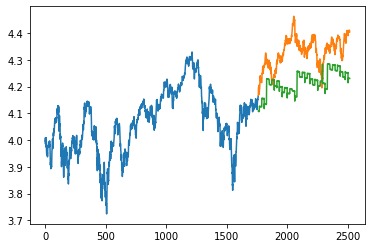

In [378]:
plt.plot(RY_LR_log_train['Close'])
plt.plot(RY_LR_log_test[['Close','Predictions']])

In [379]:
#Implementing kNN
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [380]:
scaler = MinMaxScaler(feature_range=(0,1))

In [381]:
#scaling Data
xRY_KNN_train_scaled = scaler.fit_transform(x_LR_RY_train)
x_KNN_RY_train = pd.DataFrame(xRY_KNN_train_scaled)
xRY_KNN_test_scaled = scaler.fit_transform(x_LR_RY_test)
x_KNN_RY_test = pd.DataFrame(xRY_KNN_test_scaled)

In [383]:
#using Grid search to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv = 5)

In [384]:
#fit model and make predictions
model.fit(x_KNN_RY_train, yRY_train)
KN_preds =model.predict(x_KNN_RY_test)

C:\Users\contr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [ ]:
model.fit(xRY_train, y_LR_RY_train)
KN_preds =model.predict(xRY_test)

In [110]:
#RSME
rms = np.sqrt(np.mean(np.power((np.array(yRY_test)-np.array(KN_preds)),2)))

rms

15.114466951472247

In [387]:
# Testing KNN

KNN_Log_MAPE = np.mean(np.abs(np.array(KN_preds-y_LR_RY_test)/np.abs(y_LR_RY_test))) 
print('MAPE: ', KNN_Log_MAPE)

KNN_log_mse = mean_squared_error(y_LR_RY_test, KN_preds)
print('MSE: ', KNN_log_mse)

KNN_log_rmse = np.sqrt(mean_squared_error(y_LR_RY_test, KN_preds))
print('RMSE: ', KNN_log_rmse)

MAPE:  0.05856461499234124
MSE:  0.07183744348480116
RMSE:  0.2680250799548452


C:\Users\contr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\contr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



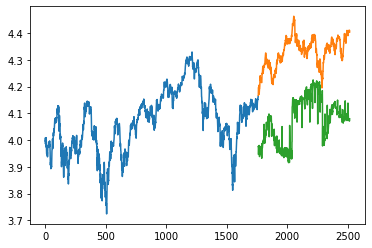

In [390]:
RY_LR_log_test['Predictions'] = 0
RY_LR_log_test['Predictions'] = KN_preds
plt.plot(RY_LR_log_train['Close'])
plt.plot(RY_LR_log_test[['Close', 'Predictions']])

C:\Users\contr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\contr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


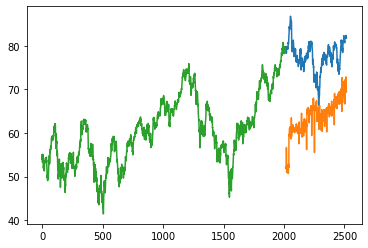

In [111]:
RY_test['Predictions'] = 0
RY_test['Predictions'] = KN_preds
plt.plot(RY_test[['Close', 'Predictions']])
plt.plot(RY_train['Close'])

In [391]:
aa_train = RY_LR_log_train['Close']
aa_test = RY_LR_log_test['Close']

In [401]:
aa_test = RY_LR_log_test['Close']
aa_test

1761    4.167440
1762    4.195245
1763    4.194642
1764    4.198554
1765    4.197653
          ...   
2512    4.403910
2513    4.409885
2514    4.410978
2515    4.406719
2516    4.404399
Name: Close, Length: 756, dtype: float64

In [392]:
from pmdarima.arima import auto_arima

In [394]:
aa_model=auto_arima(aa_train, test = 'adf',startp=0, start_q=0, max_p = 3, max_q = 3, m = 12, start_P=0,seasonal =False,D=0, trace=True,error_action='ignore',suppress_warning=True)
print(aa_model.summary())

Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-10266.450, BIC=-10244.558, Fit time=0.352 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-10269.531, BIC=-10258.585, Fit time=0.245 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-10267.815, BIC=-10251.396, Fit time=0.364 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=-10267.792, BIC=-10251.373, Fit time=0.334 seconds


C:\Users\contr\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-10271.427, BIC=-10265.954, Fit time=0.100 seconds


C:\Users\contr\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\contr\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=-10265.531, BIC=-10243.638, Fit time=0.250 seconds
Total fit time: 1.663 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 1761
Model:               SARIMAX(0, 1, 0)   Log Likelihood                5136.713
Date:                Sun, 16 Feb 2020   AIC                         -10271.427
Time:                        03:49:07   BIC                         -10265.954
Sample:                             0   HQIC                        -10269.404
                               - 1761                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   4.06e-06     42.085      0.000       0.000   

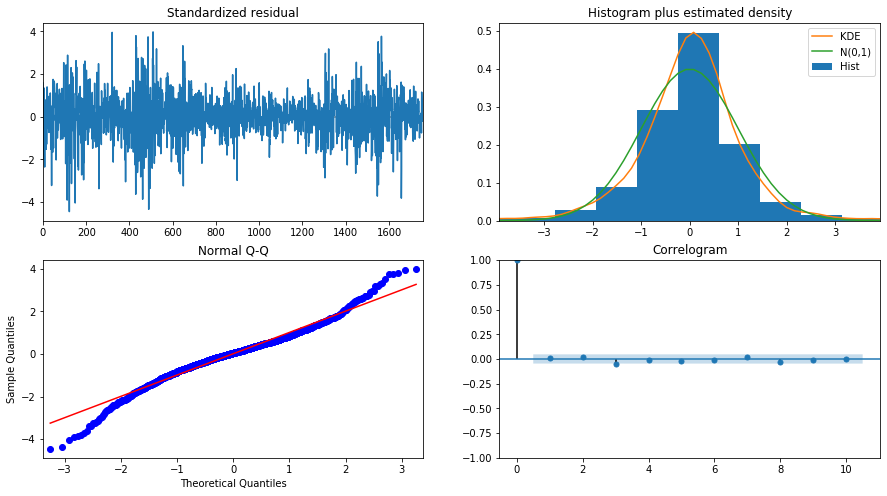

In [395]:
#plot residues
aa_model.plot_diagnostics(figsize=(15,8))
plt.show()

In [396]:
aa_model.fit(aa_train)

C:\Users\contr\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=False)

In [402]:
aa_preds= aa_model.predict(n_periods=756)

In [ ]:
aa_forecast = pd.DataFrame(forecast,index = RY_test.index, columns=['Prediction'])

In [407]:
RY_LR_log_test['Predictions'] = 0
RY_LR_log_test['Predictions'] = aa_preds

C:\Users\contr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\contr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [404]:
# Testing KNN

AA_Log_MAPE = np.mean(np.abs(np.array(aa_preds-y_LR_RY_test)/np.abs(y_LR_RY_test))) 
print('MAPE: ', AA_Log_MAPE)

AA_log_mse = mean_squared_error(y_LR_RY_test, aa_preds)
print('MSE: ', AA_log_mse)

AA_log_rmse = np.sqrt(mean_squared_error(y_LR_RY_test, aa_preds))
print('RMSE: ', AA_log_rmse)

MAPE:  0.038070161281049945
MSE:  0.030422320622093112
RMSE:  0.17441995477035624


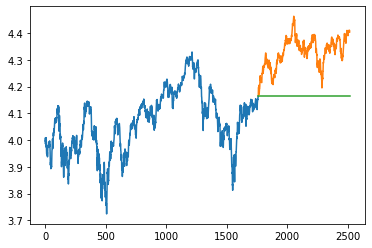

In [408]:
plt.plot(RY_LR_log_train['Close'])
plt.plot(RY_LR_log_test[['Close', 'Predictions']])

In [ ]:
aa_model=auto_arima(aa_train, startp=1, start_q=1, max_p = 3, m = 12, start_P=0,seasonal =True,D=1, trace=True,error_action='ignore',suppress_warning=True)

In [82]:
aa_model.fit(aa_train)

ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 1, 12),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [83]:
forecast = aa_model.predict(n_periods=504)


In [84]:
len(RY_test)

504

In [85]:
forecast = pd.DataFrame(forecast,index = RY_test.index, columns=['Prediction'])

In [86]:
aa_rms = np.sqrt(np.mean(np.power((np.array(RY_test['Close'])-np.array(forecast['Prediction'])),2)))

In [87]:
aa_rms

3.522003650320063

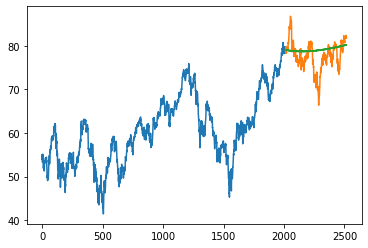

In [88]:
plt.plot(RY_train['Close'])
plt.plot(RY_test['Close'])
plt.plot(forecast['Prediction'])



In [75]:
#Auto arima
pip install pmdarima

SyntaxError: invalid syntax (<ipython-input-75-41233c6686d1>, line 2)

In [80]:
from pmdarima.arima import auto_arima

In [79]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [89]:
pip install TensorFlow

Note: you may need to restart the kernel to use updated packages.


In [406]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [431]:
base_closeprice


new name
2009-11-20    3.987872
2009-11-23    4.008605
2009-11-24    3.994156
2009-11-25    4.000766
2009-11-27    3.974810
                ...   
2019-11-14    4.403910
2019-11-15    4.409885
2019-11-18    4.410978
2019-11-19    4.406719
2019-11-20    4.404399
Length: 2517, dtype: float64

In [457]:
#Converting series to a dataframe
LSTM_closeprice = pd.DataFrame(LSTM_base_closeprice).reset_index()
LSTM_closeprice.columns = ['Date', 'Close']
LSTM_closeprice

Date     Close
0    2009-11-20  3.987872
1    2009-11-23  4.008605
2    2009-11-24  3.994156
3    2009-11-25  4.000766
4    2009-11-27  3.974810
...         ...       ...
2512 2019-11-14  4.403910
2513 2019-11-15  4.409885
2514 2019-11-18  4.410978
2515 2019-11-19  4.406719
2516 2019-11-20  4.404399

[2517 rows x 2 columns]

In [450]:
RY_RW_sub_LSTM = pd.DataFrame(index=range(0,len(RY_raw_new)),columns=['Date','Close'])

In [458]:
RY_RW_sub_LSTM = pd.DataFrame(index=range(0,len(LSTM_closeprice)),columns=['Date','Close'])

In [455]:
log_closeprice
#RY_RW_sub_LSTM = pd.DataFrame(index=range(0,len(log_closeprice)),columns=['Date','Close'])

new name
2009-11-20    3.987872
2009-11-23    4.008605
2009-11-24    3.994156
2009-11-25    4.000766
2009-11-27    3.974810
                ...   
2019-11-14    4.403910
2019-11-15    4.409885
2019-11-18    4.410978
2019-11-19    4.406719
2019-11-20    4.404399
Length: 2517, dtype: float64

In [459]:
for i in range(0,len(RY_raw_new)):
    RY_RW_sub_LSTM['Date'][i] = LSTM_closeprice['Date'][i]
    RY_RW_sub_LSTM['Close'][i] = LSTM_closeprice['Close'][i]

In [514]:
 RY_RW_sub_LSTM.head()

Close
Date               
2009-11-20  3.98787
2009-11-23  4.00861
2009-11-24  3.99416
2009-11-25  4.00077
2009-11-27  3.97481

In [461]:
 RY_RW_sub_LSTM.index =  RY_RW_sub_LSTM.Date

In [462]:
 RY_RW_sub_LSTM.drop('Date', axis=1, inplace = True)

In [463]:
RY_LSTM =  RY_RW_sub_LSTM.values

In [464]:
len(RY_LSTM)

2517

In [465]:
RY_LSTM_log_train, RY_LSTM_log_test = train_test_split(RY_LSTM, train_size = 0.7, test_size = 0.3, shuffle = False)RY_RW_sub_LSTM

In [537]:
RY_LSTM_log_test

Close
Date               
2016-11-18  4.16744
2016-11-21  4.19525
2016-11-22  4.19464
2016-11-23  4.19855
2016-11-25  4.19765
...             ...
2019-11-14  4.40391
2019-11-15  4.40988
2019-11-18  4.41098
2019-11-19  4.40672
2019-11-20   4.4044

[756 rows x 1 columns]

In [536]:
RY_LSTM_log_test = RY_LSTM_logplot_test
RY_LSTM_log_test.drop('Predictions', axis=1, inplace = True)

C:\Users\contr\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [538]:
RY_LSTM_log_train = RY_LSTM_logplot_train

In [539]:
RY_LSTM_log_train

Close
Date               
2009-11-20  3.98787
2009-11-23  4.00861
2009-11-24  3.99416
2009-11-25  4.00077
2009-11-27  3.97481
...             ...
2016-11-11  4.15057
2016-11-14  4.15716
2016-11-15  4.15873
2016-11-16  4.15904
2016-11-17  4.16418

[1761 rows x 1 columns]

In [519]:
RY_LSTM_log_test.dtype.names

In [98]:
RY_lstm_train = RY_LSTM[0:2013,:]

In [99]:
RY_lstm_test = RY_LSTM[2013:,:]

In [466]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [467]:
#Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range = (0,1))

In [468]:
# Transforming the Data
scaled_data = scaler.fit_transform(RY_LSTM)


In [469]:
scaled_data


array([[0.357047],
       [0.385102],
       [0.36555 ],
       [0.374495],
       ...,
       [0.928087],
       [0.929567],
       [0.923803],
       [0.920664]])

In [104]:
xLSTM_train, yLSTM_train = [], []
for i in range(60, len(RY_lstm_train)):
    xLSTM_train.append(scaled_data[i-60:i,0])
    yLSTM_train.append(scaled_data[i,0])
    

In [540]:
xLSTM_log_train, yLSTM_log_train = [], []
for i in range(60, len(RY_LSTM_log_train)):
    xLSTM_log_train.append(scaled_data[i-60:i,0])
    yLSTM_log_train.append(scaled_data[i,0])
    xLSTM_log_train

In [541]:
xLSTM_log_train, yLSTM_log_train = np.array(xLSTM_log_train), np.array(yLSTM_log_train)

In [549]:
xLSTM_log_train.shape()

TypeError: 'tuple' object is not callable

In [553]:

xLSTM_log_train = np.reshape(xLSTM_log_train, (xLSTM_log_train.shape[0],xLSTM_log_train.shape[1],1))

In [554]:
print(xLSTM_log_train.shape)#(1701, 60, 1)

(1701, 60, 1)


In [546]:
yLSTM_log_train = np.reshape(yLSTM_log_train, (yLSTM_log_train.shape[0],yLSTM_log_train.shape[1],1))

IndexError: tuple index out of range

In [57]:
print(yLSTM_train.shape)

(1953,)


In [556]:
xLSTM_log_train

array([[[0.357047],
        [0.385102],
        [0.36555 ],
        [0.374495],
        ...,
        [0.325064],
        [0.343686],
        [0.360054],
        [0.369035]],

       [[0.385102],
        [0.36555 ],
        [0.374495],
        [0.339372],
        ...,
        [0.343686],
        [0.360054],
        [0.369035],
        [0.379438]],

       [[0.36555 ],
        [0.374495],
        [0.339372],
        [0.363304],
        ...,
        [0.360054],
        [0.369035],
        [0.379438],
        [0.366547]],

       [[0.374495],
        [0.339372],
        [0.363304],
        [0.383627],
        ...,
        [0.369035],
        [0.379438],
        [0.366547],
        [0.330703]],

       ...,

       [[0.565419],
        [0.557655],
        [0.579964],
        [0.575276],
        ...,
        [0.561974],
        [0.568426],
        [0.581028],
        [0.577196]],

       [[0.557655],
        [0.579964],
        [0.575276],
        [0.566279],
        ...,
        [0.568426],

In [547]:
print(yLSTM_log_train.shape)#(1701,)

(1701,)


In [58]:
yLSTM_train = np.reshape(yLSTM_train, (yLSTM_train.shape[0], yLSTM_train.shape[1],1))

IndexError: tuple index out of range

In [483]:
#Create and fit LSTM

LSTM_log_model = Sequential()

In [112]:
#An LSTM layer requires a three-dimensional input and LSTMs by default will produce a two-dimensional output as
#an interpretation from the end of the sequence.We can address this by having the LSTM output a value for each time 
#step in the input data by setting the return_sequences=True argument on the layer. #This allows us to have 3D output
#from hidden LSTM layer as input to the next.
#the number of time steps and parallel series (features) are specified for the input layer via the input_shape argument.
LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(xLSTM_train.shape[1],1)))

In [555]:
LSTM_log_model.add(LSTM(units=50, return_sequences=True, input_shape=(xLSTM_log_train.shape[1],1)))

ValueError: Input 0 is incompatible with layer lstm_5: expected ndim=3, found ndim=2

In [485]:
from keras.layers import Dense, Activation, Flatten

In [490]:
#the model output shape is (None, 23, 3) whereas you want 
#it to be (None, 3). That happens because the Dense layer is 
#applied on the last axis of its input and does not 
#flatten its input automatically (if it has more than 2 dimensions).
LSTM_log_model.add(Flatten())

In [491]:
LSTM_log_model.add(Dense(1))

In [492]:
LSTM_log_model.compile(loss='mean_squared_error', optimizer='adam')

In [136]:
LSTM_model.fit(xLSTM_train, yLSTM_train, epochs = 1000, batch_size = 1, verbose=2, shuffle = False)

Epoch 1/1000
 - 97s - loss: 0.0014
Epoch 2/1000
 - 97s - loss: 0.0019
Epoch 3/1000
 - 96s - loss: 0.0023
Epoch 4/1000
 - 96s - loss: 0.0018
Epoch 5/1000
 - 96s - loss: 0.0013
Epoch 6/1000
 - 100s - loss: 0.0013
Epoch 7/1000
 - 101s - loss: 0.0012
Epoch 8/1000
 - 100s - loss: 0.0013
Epoch 9/1000
 - 100s - loss: 0.0012
Epoch 10/1000
 - 94s - loss: 9.6092e-04
Epoch 11/1000
 - 92s - loss: 8.3972e-04
Epoch 12/1000
 - 92s - loss: 7.8570e-04
Epoch 13/1000
 - 92s - loss: 8.0656e-04
Epoch 14/1000
 - 92s - loss: 6.3789e-04
Epoch 15/1000
 - 92s - loss: 5.8782e-04
Epoch 16/1000
 - 93s - loss: 4.7899e-04
Epoch 17/1000
 - 93s - loss: 4.3436e-04
Epoch 18/1000
 - 92s - loss: 4.4172e-04
Epoch 19/1000
 - 93s - loss: 5.3741e-04
Epoch 20/1000
 - 92s - loss: 7.7901e-04
Epoch 21/1000
 - 92s - loss: 7.1194e-04
Epoch 22/1000
 - 92s - loss: 5.0143e-04
Epoch 23/1000
 - 92s - loss: 5.2138e-04
Epoch 24/1000
 - 91s - loss: 7.5533e-04
Epoch 25/1000
 - 92s - loss: 5.5320e-04
Epoch 26/1000
 - 868s - loss: 4.2490e-04


Epoch 205/1000
 - 22s - loss: 3.0068e-04
Epoch 206/1000
 - 22s - loss: 2.9926e-04
Epoch 207/1000
 - 22s - loss: 3.3783e-04
Epoch 208/1000
 - 22s - loss: 2.9278e-04
Epoch 209/1000
 - 22s - loss: 2.9630e-04
Epoch 210/1000
 - 22s - loss: 3.3901e-04
Epoch 211/1000
 - 22s - loss: 2.8099e-04
Epoch 212/1000
 - 22s - loss: 2.8942e-04
Epoch 213/1000
 - 22s - loss: 3.0774e-04
Epoch 214/1000
 - 22s - loss: 2.8938e-04
Epoch 215/1000
 - 22s - loss: 3.2014e-04
Epoch 216/1000
 - 22s - loss: 2.7954e-04
Epoch 217/1000
 - 22s - loss: 2.8114e-04
Epoch 218/1000
 - 22s - loss: 3.5159e-04
Epoch 219/1000
 - 22s - loss: 2.9037e-04
Epoch 220/1000
 - 22s - loss: 2.9732e-04
Epoch 221/1000
 - 22s - loss: 3.3308e-04
Epoch 222/1000
 - 22s - loss: 3.0666e-04
Epoch 223/1000
 - 22s - loss: 3.3110e-04
Epoch 224/1000
 - 22s - loss: 2.7493e-04
Epoch 225/1000
 - 22s - loss: 2.8473e-04
Epoch 226/1000
 - 22s - loss: 3.3156e-04
Epoch 227/1000
 - 22s - loss: 2.7441e-04
Epoch 228/1000
 - 22s - loss: 2.9653e-04
Epoch 229/1000
 

Epoch 405/1000
 - 22s - loss: 2.9143e-04
Epoch 406/1000
 - 22s - loss: 2.6042e-04
Epoch 407/1000
 - 22s - loss: 2.6600e-04
Epoch 408/1000
 - 22s - loss: 2.9227e-04
Epoch 409/1000
 - 22s - loss: 2.6437e-04
Epoch 410/1000
 - 22s - loss: 2.6151e-04
Epoch 411/1000
 - 22s - loss: 2.9004e-04
Epoch 412/1000
 - 22s - loss: 2.7453e-04
Epoch 413/1000
 - 22s - loss: 2.5872e-04
Epoch 414/1000
 - 22s - loss: 2.8044e-04
Epoch 415/1000
 - 22s - loss: 2.8668e-04
Epoch 416/1000
 - 22s - loss: 2.5676e-04
Epoch 417/1000
 - 22s - loss: 2.6751e-04
Epoch 418/1000
 - 22s - loss: 2.9196e-04
Epoch 419/1000
 - 22s - loss: 2.6066e-04
Epoch 420/1000
 - 22s - loss: 2.6067e-04
Epoch 421/1000
 - 22s - loss: 2.8952e-04
Epoch 422/1000
 - 22s - loss: 2.7812e-04
Epoch 423/1000
 - 22s - loss: 2.5658e-04
Epoch 424/1000
 - 22s - loss: 2.7268e-04
Epoch 425/1000
 - 22s - loss: 2.9514e-04
Epoch 426/1000
 - 22s - loss: 2.5876e-04
Epoch 427/1000
 - 22s - loss: 2.6386e-04
Epoch 428/1000
 - 22s - loss: 2.9274e-04
Epoch 429/1000
 

Epoch 605/1000
 - 22s - loss: 2.6037e-04
Epoch 606/1000
 - 22s - loss: 2.7480e-04
Epoch 607/1000
 - 22s - loss: 2.6021e-04
Epoch 608/1000
 - 22s - loss: 2.7626e-04
Epoch 609/1000
 - 22s - loss: 2.5977e-04
Epoch 610/1000
 - 22s - loss: 2.7000e-04
Epoch 611/1000
 - 22s - loss: 2.5739e-04
Epoch 612/1000
 - 22s - loss: 2.6698e-04
Epoch 613/1000
 - 22s - loss: 2.5804e-04
Epoch 614/1000
 - 22s - loss: 2.6794e-04
Epoch 615/1000
 - 22s - loss: 2.5915e-04
Epoch 616/1000
 - 22s - loss: 2.6841e-04
Epoch 617/1000
 - 22s - loss: 2.5816e-04
Epoch 618/1000
 - 22s - loss: 2.6783e-04
Epoch 619/1000
 - 22s - loss: 2.5644e-04
Epoch 620/1000
 - 22s - loss: 2.6670e-04
Epoch 621/1000
 - 22s - loss: 2.5656e-04
Epoch 622/1000
 - 22s - loss: 2.6629e-04
Epoch 623/1000
 - 22s - loss: 2.5771e-04
Epoch 624/1000
 - 22s - loss: 2.6575e-04
Epoch 625/1000
 - 22s - loss: 2.5810e-04
Epoch 626/1000
 - 22s - loss: 2.6537e-04
Epoch 627/1000
 - 22s - loss: 2.5820e-04
Epoch 628/1000
 - 22s - loss: 2.6523e-04
Epoch 629/1000
 

Epoch 805/1000
 - 22s - loss: 2.5273e-04
Epoch 806/1000
 - 22s - loss: 2.6125e-04
Epoch 807/1000
 - 22s - loss: 2.5307e-04
Epoch 808/1000
 - 22s - loss: 2.6073e-04
Epoch 809/1000
 - 22s - loss: 2.4747e-04
Epoch 810/1000
 - 22s - loss: 2.5840e-04
Epoch 811/1000
 - 22s - loss: 2.4937e-04
Epoch 812/1000
 - 22s - loss: 2.6046e-04
Epoch 813/1000
 - 22s - loss: 2.5024e-04
Epoch 814/1000
 - 22s - loss: 2.5706e-04
Epoch 815/1000
 - 22s - loss: 2.4709e-04
Epoch 816/1000
 - 22s - loss: 2.5909e-04
Epoch 817/1000
 - 22s - loss: 2.4945e-04
Epoch 818/1000
 - 22s - loss: 2.5811e-04
Epoch 819/1000
 - 22s - loss: 2.4750e-04
Epoch 820/1000
 - 22s - loss: 2.6022e-04
Epoch 821/1000
 - 22s - loss: 2.5001e-04
Epoch 822/1000
 - 22s - loss: 2.5800e-04
Epoch 823/1000
 - 22s - loss: 2.4708e-04
Epoch 824/1000
 - 22s - loss: 2.6095e-04
Epoch 825/1000
 - 22s - loss: 2.5036e-04
Epoch 826/1000
 - 22s - loss: 2.5604e-04
Epoch 827/1000
 - 22s - loss: 2.4589e-04
Epoch 828/1000
 - 22s - loss: 2.6037e-04
Epoch 829/1000
 

In [493]:
LSTM_log_model.fit(xLSTM_log_train, yLSTM_log_train, epochs = 150, batch_size = 2, verbose=2, shuffle = False)

Epoch 1/150
 - 19s - loss: 0.0033
Epoch 2/150
 - 20s - loss: 0.0033
Epoch 3/150
 - 20s - loss: 0.0028
Epoch 4/150
 - 20s - loss: 0.0025
Epoch 5/150
 - 20s - loss: 0.0022
Epoch 6/150
 - 20s - loss: 0.0021
Epoch 7/150
 - 20s - loss: 0.0022
Epoch 8/150
 - 20s - loss: 0.0019
Epoch 9/150
 - 20s - loss: 0.0018
Epoch 10/150
 - 20s - loss: 0.0016
Epoch 11/150
 - 20s - loss: 0.0014
Epoch 12/150
 - 20s - loss: 0.0013
Epoch 13/150
 - 20s - loss: 0.0012
Epoch 14/150
 - 20s - loss: 0.0012
Epoch 15/150
 - 20s - loss: 0.0012
Epoch 16/150
 - 20s - loss: 0.0013
Epoch 17/150
 - 20s - loss: 0.0011
Epoch 18/150
 - 20s - loss: 0.0011
Epoch 19/150
 - 20s - loss: 9.7207e-04
Epoch 20/150
 - 20s - loss: 8.9514e-04
Epoch 21/150
 - 20s - loss: 8.3490e-04
Epoch 22/150
 - 20s - loss: 7.9212e-04
Epoch 23/150
 - 20s - loss: 7.6812e-04
Epoch 24/150
 - 20s - loss: 7.6008e-04
Epoch 25/150
 - 20s - loss: 7.4053e-04
Epoch 26/150
 - 20s - loss: 8.5976e-04
Epoch 27/150
 - 20s - loss: 7.6508e-04
Epoch 28/150
 - 20s - loss: 

In [137]:
print(LSTM_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3001      
Total params: 13,401
Trainable params: 13,401
Non-trainable params: 0
_________________________________________________________________
None


In [494]:
print(LSTM_log_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3001      
Total params: 33,601
Trainable params: 33,601
Non-trainable params: 0
_________________________________________________________________
None


In [495]:
# predicting Values using past 60 from th etrain data
inputs = RY_RW_sub_LSTM[len(RY_RW_sub_LSTM) - len(RY_LSTM_log_test) - 60:].values

In [ ]:
xLSTM_log_train

In [496]:
inputs = inputs.reshape(-1,1)

In [497]:
inputs = scaler.transform(inputs)

In [498]:
xLSTM_log_test = []
for i in range(60, inputs.shape[0]):
    xLSTM_log_test.append(inputs[i-60:i,0])

In [499]:
xLSTM_log_test = np.array(xLSTM_log_test)

In [500]:
xLSTM_log_test = np.reshape(xLSTM_log_test, (xLSTM_log_test.shape[0],xLSTM_log_test.shape[1],1))

In [125]:
#inverse scaling
closing_price = LSTM_model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)

In [501]:

LSTM_preds = LSTM_log_model.predict(xLSTM_log_test)
LSTM_preds = scaler.inverse_transform(LSTM_preds)

In [502]:
# Testing KNN

LSTM_Log_MAPE = np.mean(np.abs(np.array(LSTM_preds-RY_LSTM_log_test)/np.abs(RY_LSTM_log_test))) 
print('MAPE: ', LSTM_Log_MAPE)

LSTM_log_mse = mean_squared_error(RY_LSTM_log_test, LSTM_preds)
print('MSE: ', LSTM_log_mse)

LSTM_log_rmse = np.sqrt(mean_squared_error(RY_LSTM_log_test, LSTM_preds))
print('RMSE: ', LSTM_log_rmse)

MAPE:  0.030538572657389313
MSE:  0.019193390806968885
RMSE:  0.13854021368169203


In [126]:
lstm_rms = np.sqrt(np.mean(np.power((RY_lstm_test-closing_price),2)))

In [505]:
lstm_log_rms = np.sqrt(np.mean(np.power((RY_LSTM_log_test-LSTM_preds),2)))

In [506]:
lstm_log_rms

0.1385402136816921

In [127]:
lstm_rms

5.814235763301191

In [526]:
dt = {'names':['Close'], 'formats':[np.int32]}
RY_LSTM_logplot_train.dtype = dt


In [527]:
RY_LSTM_logplot_train

Close
Date               
2009-11-20  3.98787
2009-11-23  4.00861
2009-11-24  3.99416
2009-11-25  4.00077
2009-11-27  3.97481
...             ...
2016-11-11  4.15057
2016-11-14  4.15716
2016-11-15  4.15873
2016-11-16  4.15904
2016-11-17  4.16418

[1761 rows x 1 columns]

In [528]:
dz = {'names':['Close'], 'formats':[np.int32]}
RY_LSTM_logplot_test.dtype = dz

In [532]:
RY_LSTM_logplot_test

Close  Predictions
Date                            
2016-11-18  4.16744     4.157863
2016-11-21  4.19525     4.162032
2016-11-22  4.19464     4.182730
2016-11-23  4.19855     4.180843
2016-11-25  4.19765     4.183559
...             ...          ...
2019-11-14  4.40391     4.223000
2019-11-15  4.40988     4.222825
2019-11-18  4.41098     4.223200
2019-11-19  4.40672     4.224860
2019-11-20   4.4044     4.223466

[756 rows x 2 columns]

KeyError: ('Close', 'Predictions')

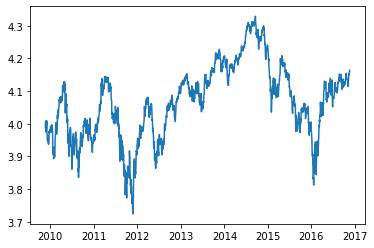

In [531]:
#RY_LSTM_logplot_train, RY_LSTM_logplot_test = train_test_split(RY_RW_sub_LSTM, train_size = 0.7, test_size = 0.3, shuffle = False)
#RY_LSTM_logplot_test['Predictions'] = 0
#RY_LSTM_logplot_test['Predictions'] = LSTM_preds


plt.plot(RY_LSTM_logplot_train['Close'])
plt.plot(RY_LSTM_logplot_test['Close', 'Predictions'])


In [569]:
# Bayesin LSTN

#Transforming the dat to Time series
# Resampling the time series data on daily basis. we apply it on stock close price.  '1D' indicates one day. This wil find the
#mean closing  price  of each day for a duration of 12 months 
resample_RY = RY_raw.set_index('Date').resample('1D').mean()
resample_RY['Date'] = resample_RY.index
#To alleviate exponential effects, the target variable is log-transformed as per the Uber paper.
resample_RY['log_Closing'] = np.log(resample_RY['Close'])

datetime_columns = ['Date','Year','Month','WeekofYear','WeekDay']
target_columns = 'log_Closing'

feature_columns = datetime_columns + ['log_Closing']

resample_RY = resample_RY[feature_columns]

In [572]:
resample_RY = resample_RY[np.isfinite(resample_RY['log_Closing'])]

In [573]:
resample_RY #before 3653 after removing NA 2517

Date    Year  Month  WeekofYear  WeekDay  log_Closing
Date                                                                  
2009-11-20 2009-11-20  2009.0   11.0        47.0      4.0     3.987872
2009-11-23 2009-11-23  2009.0   11.0        48.0      0.0     4.008605
2009-11-24 2009-11-24  2009.0   11.0        48.0      1.0     3.994156
2009-11-25 2009-11-25  2009.0   11.0        48.0      2.0     4.000766
2009-11-27 2009-11-27  2009.0   11.0        48.0      4.0     3.974810
...               ...     ...    ...         ...      ...          ...
2019-11-14 2019-11-14  2019.0   11.0        46.0      3.0     4.403910
2019-11-15 2019-11-15  2019.0   11.0        46.0      4.0     4.409885
2019-11-18 2019-11-18  2019.0   11.0        47.0      0.0     4.410978
2019-11-19 2019-11-19  2019.0   11.0        47.0      1.0     4.406719
2019-11-20 2019-11-20  2019.0   11.0        47.0      2.0     4.404399

[2517 rows x 6 columns]

In [151]:
plot_length = 523
plot_df = RY_raw.copy(deep=True)#.iloc[:plot_length]
plot_df['WeekDay'] = plot_df['Date'].dt.weekday_name

fig_1 = px.line(plot_df, x = "Date", y = "Close", color = "WeekDay",
             title = "Closing Rate Vs Time")

In [155]:
RY_raw.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume                 int64
Year                   int64
Month                  int64
Day                    int64
WeekofYear             int64
WeekDay                int64
dtype: object

In [54]:
resample_RY.dtypes

Date          datetime64[ns]
Year                 float64
Month                  int32
WeekofYear             int32
WeekDay                int32
Close                float64
dtype: object

In [574]:
#resample_RY.Year = resample_RY.Year.astype(int)
resample_RY.Month = resample_RY.Month.astype(int)
resample_RY.WeekofYear = resample_RY.WeekofYear.astype(int)
resample_RY.WeekDay = resample_RY.WeekDay.astype(int)


C:\Users\contr\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [575]:
fig_1.show()

NameError: name 'fig_1' is not defined

In [576]:
plot_length = 2517
plot_df = resample_RY.copy(deep=True).iloc[:plot_length]
plot_df['weekday'] = plot_df['Date'].dt.weekday_name

fig = px.line(plot_df, x = "Date", y = "log_Closing", color = "WeekDay",
             title = "Closing Rate Vs Time")

In [577]:
fig.show()

In [579]:
#Preparing training Data
def create_sliding_window(data, sequence_length, stride = 1):
    X_List, Y_List = [], []
    for i in range(len(data)):
        if(i + sequence_length) < len(data):
            X_List.append(data.iloc[i:i+sequence_length:stride, :].values)
            Y_List.append(data.iloc[i+sequence_length, -1])
    return np.array(X_List), np.array(Y_List)

train_split = 0.7
n_train = int(train_split * len(resample_RY))
n_test = len(resample_RY) - n_train

feature = ['Year','Month','WeekofYear','WeekDay','log_Closing']
feature_array = resample_RY[feature].values

#Fit Scaler only on  Training Features. Define a scaler to normalize the data. 
#MinMaxScalar scales all the data to be in the region of 0 and 1
# Check: You normalize both test and train data with respect to training data. Because you are not supposed to have access to test data
feature_scaler = MinMaxScaler()
feature_scaler.fit(feature_array[:n_train])

#Fit Scaler only on Training target values(test)
target_scaler = MinMaxScaler()
target_scaler.fit(feature_array[:n_train, -1].reshape(-1,1))

#Transform on both Training and Test Data
scaled_array = pd.DataFrame(feature_scaler.transform(feature_array), columns=feature)

# we take 5 days and try to predict the 6th day. Move the 5 day window by 1 and then again predict the 6th day
sequence_length = 5
x, y = create_sliding_window(scaled_array, sequence_length)

x_train = x[:n_train]
y_train = y[:n_train]

xdef_test = x[n_train:]
y_test = y[n_train:]

In [580]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [581]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))


NameError: name 'sklearn' is not defined

In [583]:
class BayesianLSTM(nn.Module):
        #Construct function
        def __init__(self, n_features, output_length):
        
            super(BayesianLSTM, self).__init__()
            #Hidden dimensions        
            self.hidden_size_1 = 128
            self.hidden_size_2 = 32 
            self.n_layers = 1
           # batch_first=True causes input/output tensors to be of shape
            # (batch_dim, seq_dim, feature_dim)            
        
            self.lstm1 = nn.LSTM(n_features, self.hidden_size_1,num_layers=1, batch_first = True)
            self.lstm2 = nn.LSTM(self.hidden_size_1, self.hidden_size_2, num_layers=1, batch_first = True)
            # Readout layer
            self.dense = nn.Linear(self.hidden_size_2, output_length)
            self.loss_fn = nn.MSELoss()
        
        def forward(self, x):
            batch_size, seq_len, _ = x.size()
            
            hidden = self.init_hidden1(batch_size)
            output, _ = self.lstm1(x, hidden)
            output = F.dropout(output, p=0.5, training = True)
            
            state = self.init_hidden2(batch_size)
            output, state = self.lstm2(output, state)
            output = F.dropout(output, p =0.5, training = True)
            ,
            output = self.dense(state[0].squeeze(0))
            
            return output
        
        def init_hidden1(self, batch_size):
            #Initialize hidden state with 0
            hidden_state = Variable(torch.zeros(self.n_layers, batch_size, self.hidden_size_1))
            #Initialize Cell State
            cell_state = Variable(torch.zeros(self.n_layers, batch_size, self.hidden_size_1))
            return hidden_state, cell_state
        
        def init_hidden2(self, batch_size):
            #Initialize hidden state with 0
            hidden_state = Variable(torch.zeros(self.n_layers, batch_size, self.hidden_size_2))
            #Initialize Cell State
            cell_state = Variable(torch.zeros(self.n_layers, batch_size, self.hidden_size_2))
            return hidden_state, cell_state
        
        def loss(self, pred, truth):
            return torch.sqrt(self.loss_fn(pred, truth))
        
        def predict(self, X):
            return self(torch.tensor(X, dtype = torch.float32)).view(-1).detach().numpy()
        
            
        
    
        

In [584]:
#instantiate Bayesian LSTM model
n_features = scaled_array.shape[-1] #o/p 5
sequence_length = 5
output_length = 1

#pass agruements to the class
bayesian_lstm = BayesianLSTM(n_features=n_features, output_length=output_length)

#instantiate Loss Class use cross entropy for classification problem and MSE for Regression
criterion = torch.nn.MSELoss() 


#learning rate = 0.1
optimizer = torch.optim.Adam(bayesian_lstm.parameters(), lr = 0.01)

batch_size = 128 
n_epochs = 150

In [22]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.21.3.


In [33]:
n_features

5

In [585]:
bayesian_lstm.train()

for e in range(1, n_epochs+1):
    for b in range(0, len(x_train), batch_size):
        features = x_train[b:b+batch_size,:,:]
        target = y_train[b:b+batch_size]
        
        x_batch = torch.tensor(features,dtype = torch.float32)
        y_batch = torch.tensor(target,dtype = torch.float32)
        
        output = bayesian_lstm(x_batch)
        # Calculate Loss: softmax --> MSE
        loss = torch.sqrt(criterion(output.view(-1), y_batch))
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        # Updating parameters
        optimizer.step()
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
    if e % 10 == 0:
        print('epoch:', e, 'loss:', loss.item())

epoch: 10 loss: 0.17628955841064453
epoch: 20 loss: 0.0658060759305954
epoch: 30 loss: 0.08121701329946518
epoch: 40 loss: 0.05105665326118469
epoch: 50 loss: 0.0337093286216259
epoch: 60 loss: 0.06234809383749962
epoch: 70 loss: 0.02205415442585945
epoch: 80 loss: 0.02559736929833889
epoch: 90 loss: 0.022479387000203133
epoch: 100 loss: 0.02333284541964531
epoch: 110 loss: 0.018135525286197662
epoch: 120 loss: 0.07830693572759628
epoch: 130 loss: 0.07735367119312286
epoch: 140 loss: 0.031113246455788612
epoch: 150 loss: 0.04340587556362152


In [586]:
training_df

NameError: name 'training_df' is not defined

In [587]:
#Model Evaluation

offset = sequence_length

def inverse_transform(y):
    return target_scaler.inverse_transform(y.reshape(-1,1))

training_df = pd.DataFrame()
training_df['Date'] = resample_RY['Date'].iloc[offset:n_train + offset:1]
#Apply bayesin Function
training_predictions = bayesian_lstm.predict(x_train)
training_df['log_Closing'] = inverse_transform(training_predictions)
training_df['Source'] = 'Training Prediction'

training_true_df = pd.DataFrame()
training_true_df['Date'] = training_df['Date']
training_true_df['log_Closing'] = resample_RY['log_Closing'].iloc[offset:n_train + offset:1] 
training_true_df['Source'] = 'True Values'

testing_df = pd.DataFrame()
testing_df['Date'] = resample_RY['Date'].iloc[n_train + offset::1]
#Apply bayesin Function
testing_predictions = bayesian_lstm.predict(xdef_test)
testing_df['log_Closing'] = inverse_transform(testing_predictions)
testing_df['Source'] = 'Testing Prediction'

testing_true_df = pd.DataFrame()
testing_true_df['Date'] = testing_df['Date']
testing_true_df['log_Closing'] = resample_RY['log_Closing'].iloc[n_train + offset::1]
testing_true_df['Source'] = 'True Values'

Evaluation = pd.concat([training_df,
                        testing_df,
                        training_true_df,testing_true_df
                       ], axis = 0, sort = True)




In [ ]:
testing_predictions = bayesian_lstm.predict(xdef_test)

In [588]:
testing_df

Date  log_Closing              Source
Date                                                  
2016-11-28 2016-11-28     4.196540  Testing Prediction
2016-11-29 2016-11-29     4.222424  Testing Prediction
2016-11-30 2016-11-30     4.243239  Testing Prediction
2016-12-01 2016-12-01     4.183474  Testing Prediction
2016-12-02 2016-12-02     4.208267  Testing Prediction
...               ...          ...                 ...
2019-11-14 2019-11-14     4.354757  Testing Prediction
2019-11-15 2019-11-15     4.365109  Testing Prediction
2019-11-18 2019-11-18     4.370879  Testing Prediction
2019-11-19 2019-11-19     4.364688  Testing Prediction
2019-11-20 2019-11-20     4.367342  Testing Prediction

[751 rows x 3 columns]

In [589]:
testing_true_df

Date  log_Closing       Source
Date                                           
2016-11-28 2016-11-28     4.197052  True Values
2016-11-29 2016-11-29     4.205439  True Values
2016-11-30 2016-11-30     4.171614  True Values
2016-12-01 2016-12-01     4.181439  True Values
2016-12-02 2016-12-02     4.190715  True Values
...               ...          ...          ...
2019-11-14 2019-11-14     4.403910  True Values
2019-11-15 2019-11-15     4.409885  True Values
2019-11-18 2019-11-18     4.410978  True Values
2019-11-19 2019-11-19     4.406719  True Values
2019-11-20 2019-11-20     4.404399  True Values

[751 rows x 3 columns]

In [590]:
print(bayesian_lstm)

BayesianLSTM(
  (lstm1): LSTM(5, 128, batch_first=True)
  (lstm2): LSTM(128, 32, batch_first=True)
  (dense): Linear(in_features=32, out_features=1, bias=True)
  (loss_fn): MSELoss()
)


In [72]:
print(LSTM_model.summary())

AttributeError: 'BayesianLSTM' object has no attribute 'summary'

In [68]:
BLSTM_RMSE = np.sqrt(np.mean(np.power(testing_true_df['log_Closing'] - testing_df['log_Closing'],2)))

In [592]:
# Testing KNN

BLSTM_Log_MAPE = np.mean(np.abs(np.array(testing_df['log_Closing']-testing_true_df['log_Closing'])/np.abs(testing_true_df['log_Closing']))) 
print('MAPE: ', BLSTM_Log_MAPE)

BLSTM_log_mse = mean_squared_error(testing_true_df['log_Closing'], testing_df['log_Closing'])
print('MSE: ', BLSTM_log_mse)

BLSTM_log_rmse = np.sqrt(mean_squared_error(testing_true_df['log_Closing'], testing_df['log_Closing']))
print('RMSE: ', BLSTM_log_rmse)

MAPE:  0.004635376110782879
MSE:  0.0006562589536092356
RMSE:  0.025617551670861046


In [69]:
BLSTM_RMSE

2.3700411002797597

In [557]:
Evaluation


NameError: name 'Evaluation' is not defined

In [71]:
fig = px.line(Evaluation.loc[Evaluation['Date'].between('2010-05-30','2019-01-31')],
              x ="Date",
             y = "Close",
             color = "Source",
             title = "Closing rates in CAD vs Time in Years")

fig.show()

In [189]:
Evaluation.dtypes

Date           datetime64[ns]
Source                 object
log_Closing           float64
dtype: object

In [190]:
Evaluation['index'] = Evaluation['Date'].astype(str)

In [99]:
Evaluation

Date               Source  log_Closing
Date                                                   
2009-12-27 2009-12-27  Training Prediction     3.633101
2010-01-03 2010-01-03  Training Prediction     3.639474
2010-01-10 2010-01-10  Training Prediction     3.634306
2010-01-17 2010-01-17  Training Prediction     3.634044
2010-01-24 2010-01-24  Training Prediction     3.633455
...               ...                  ...          ...
2016-11-27 2016-11-27          True Values     4.196525
2016-12-04 2016-12-04          True Values     4.189321
2016-12-11 2016-12-11          True Values     4.206601
2016-12-18 2016-12-18          True Values     4.230360
2016-12-25 2016-12-25          True Values     4.224846

[1464 rows x 3 columns]

In [182]:
len(experiment_predictions)

751

In [183]:
len(test_uncertainity_df)

1761

In [185]:
len(xdef_test)

751

In [73]:
n_experiments =1761

test_uncertainty_df = pd.DataFrame()
test_uncertainty_df['Date'] = testing_df['Date']

#Error ValueError: Length of values does not match length of index
for i in range(n_experiments):
    experiment_predictions = bayesian_lstm.predict(xdef_test)
    test_uncertainty_df['Close{}'.format(i)]  = inverse_transform(experiment_predictions)
    
Closing_df = test_uncertainty_df.filter(like = 'Close', axis = 1)

test_uncertainty_df['Close_mean'] = Closing_df.mean(axis=1)
test_uncertainty_df['Close_std'] = Closing_df.std(axis=1)

test_uncertainty_df = test_uncertainty_df[['Date', 'Close_mean','Close_std']]

In [74]:
test_uncertainty_df['lower_bound'] = test_uncertainty_df['Close_mean'] - 3*test_uncertainty_df['Close_std']
test_uncertainty_df['upper_bound'] = test_uncertainty_df['Close_mean'] + 3*test_uncertainty_df['Close_std']

In [75]:
import plotly.graph_objects as go

test_uncertainty_plot_df = test_uncertainty_df.copy(deep=True)
test_uncertainty_plot_df = test_uncertainty_plot_df.loc[test_uncertainty_plot_df['Date'].between('2009-11-20', '2019-11-15')]
truth_uncertainty_plot_df = testing_true_df.copy(deep=True)
truth_uncertainty_plot_df = truth_uncertainty_plot_df.loc[testing_true_df['Date'].between('2009-11-20', '2019-11-15')]

upper_trace = go.Scatter(
    x=test_uncertainty_plot_df['Date'],
    y=test_uncertainty_plot_df['upper_bound'],
    mode='lines',
    fill=None,
    name='99% Upper Confidence Bound'
    )
lower_trace = go.Scatter(
    x=test_uncertainty_plot_df['Date'],
    y=test_uncertainty_plot_df['lower_bound'],
    mode='lines',
    fill='tonexty',
    fillcolor='rgba(255, 211, 0, 0.5)',
    name='99% Lower Confidence Bound'
    )
real_trace = go.Scatter(
    x=truth_uncertainty_plot_df['Date'],
    y=truth_uncertainty_plot_df['Close'],
    mode='lines',
    fill=None,
    name='Real Values'
    )

data = [upper_trace, lower_trace, real_trace]

fig = go.Figure(data=data)
fig.update_layout(title='Uncertainty Quantification for Closing Price of Test Data',
                   xaxis_title='Time',
                   yaxis_title='Close Price CAD)')

fig.show()

In [198]:
test_uncertainty_df

NameError: name 'test_uncertainty_df' is not defined

In [204]:
bounds_df = pd.DataFrame()

# Using 99% confidence bounds
bounds_df['lower_bound'] = test_uncertainty_plot_df['lower_bound']
bounds_df['prediction'] = test_uncertainty_plot_df['Close_mean']
bounds_df['real_value'] = truth_uncertainty_plot_df['Close']
bounds_df['upper_bound'] = test_uncertainty_plot_df['upper_bound']

bounds_df['contained'] = ((bounds_df['real_value'] >= bounds_df['lower_bound']) &
                          (bounds_df['real_value'] <= bounds_df['upper_bound']))

print("Proportion of points contained within 99% confidence interval:", 
      bounds_df['contained'].mean())

Proportion of points contained within 99% confidence interval: 0.0213903743315508
